<a href="https://colab.research.google.com/github/KumaranSS/Training_AI_To_Create_Poetry/blob/master/English_poetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving al-green.txt to al-green.txt


In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [0]:
tokenizer = Tokenizer()

data = open('al-green.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'you': 1, 'i': 2, 'me': 3, 'to': 4, 'love': 5, 'the': 6, 'and': 7, 'baby': 8, 'my': 9, 'a': 10, 'oh': 11, 'it': 12, 'in': 13, "i'm": 14, 'is': 15, 'that': 16, 'for': 17, 'hey': 18, 'la': 19, 'yeah': 20, 'on': 21, 'do': 22, 'all': 23, 'know': 24, 'your': 25, 'can': 26, 'of': 27, 'just': 28, 'no': 29, 'be': 30, "don't": 31, 'but': 32, 'say': 33, 'da': 34, 'so': 35, 'time': 36, 'this': 37, 'with': 38, 'let': 39, 'make': 40, "it's": 41, 'like': 42, 'want': 43, "can't": 44, 'down': 45, 'what': 46, 'see': 47, 'have': 48, 'take': 49, 'been': 50, 'beautiful': 51, 'one': 52, 'good': 53, 'go': 54, 'never': 55, 'about': 56, 'feel': 57, 'now': 58, 'how': 59, "i've": 60, 'get': 61, 'everything': 62, 'away': 63, 'more': 64, 'will': 65, 'come': 66, 'we': 67, 'here': 68, 'hold': 69, 'got': 70, "let's": 71, "you're": 72, 'if': 73, 'way': 74, 'happiness': 75, 'free': 76, 'thing': 77, 'stay': 78, 'tell': 79, 'nobody': 80, 'up': 81, 'going': 82, 'by': 83, 'long': 84, 'gonna': 85, 'wanna': 86, 'fire': 87,

In [0]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [0]:

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=40, verbose=1)
#print model.summary()
print(model)

Epoch 1/40
455/455 [==============================] - 33s 74ms/step - loss: 4.9505 - accuracy: 0.1502
Epoch 2/40
455/455 [==============================] - 34s 74ms/step - loss: 3.5769 - accuracy: 0.3191
Epoch 3/40
455/455 [==============================] - 34s 74ms/step - loss: 2.8171 - accuracy: 0.4100
Epoch 4/40
455/455 [==============================] - 34s 76ms/step - loss: 2.3295 - accuracy: 0.4744
Epoch 5/40
455/455 [==============================] - 34s 75ms/step - loss: 2.0113 - accuracy: 0.5246
Epoch 6/40
455/455 [==============================] - 35s 76ms/step - loss: 1.7695 - accuracy: 0.5653
Epoch 7/40
455/455 [==============================] - 34s 75ms/step - loss: 1.6311 - accuracy: 0.5945
Epoch 8/40
455/455 [==============================] - 34s 75ms/step - loss: 1.5441 - accuracy: 0.6112
Epoch 9/40
455/455 [==============================] - 34s 76ms/step - loss: 1.4443 - accuracy: 0.6247
Epoch 10/40
455/455 [==============================] - 34s 75ms/step - loss: 1.378

In [0]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I've got a bad feeling about this time just try i've tried to understand about a time hanging around of the off of other peoples plates when you're at pay all apart all apart all apart all apart all apart all apart way to me baby yeah mocking down about somethings i want everybody to waste each other's time belle belle get will rainin' all over me i didn't meant it baby you ain't my heart even just begun my night now it hurts me so flower in my broken nobody come on and on yourself you lady do you people start to criticize it ain't no


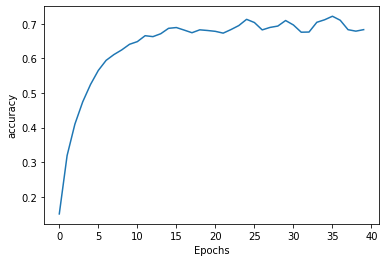

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
plot_graphs(history, 'accuracy')